In [1]:
# Python standard library
import sys
import csv
import os

# Scientific computing

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage
import sklearn.mixture

#plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', 'repo')
sys.path.append(PORE_STATS_BASE_DIRECTORY)


import optical_imaging as oi
import oi_file
import image_processing as ip

In [113]:
#data_base_path = oi_file.data_base_path
data_base_path = 'D:/'
date = '11-5-20'
particle_type = '/hl60d'
channel_type = '/25_50_25x150'
file_index = '2'

file_path = data_base_path + date + particle_type + channel_type + '/oi/'+ file_index+ '/bin/test_camera_0.raw'

#file_path = data_base_path + date + particle_type + channel_type + '/oi/'+ file_index+ '/bin/frames/frames.txt'


# Set output file path
output_file_path = data_base_path + date + particle_type + channel_type + '/oi/' + file_index + '/events/test_camera_0' + '_events.json'

# Open video
res_x = 880
res_y = 140
fps = 11103
exp = 1.54
cam = 0

## camera = 0 is raw 16bpp chronos
oi_vid = oi_file.Video(file_path, res_x, res_y, fps, exp,camera=cam)

D:/11-5-20/hl60d/25_50_25x150/oi/2/stage/stage_0.txt
[[165, 125], [165, 15], [710, 20], [710, 130]]
[-0.00917393  0.99995792]


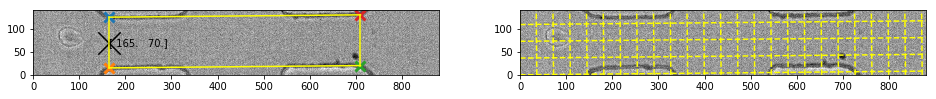

In [115]:
reload(oi)
template_frame = oi_vid.get_frame(2).astype(np.float32)
 
stage_file_path = data_base_path + date + particle_type + channel_type + '/oi/'+ file_index + '/stage/stage_0.txt' 
print stage_file_path
cs = oi.load_stage_file(stage_file_path)
print cs
c0 = cs[0]
c1 = cs[1]
c2 = cs[2]
c3 = cs[3]

oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
#oi_stage._length_microns = 150
oi_stage.plot_stage()